<a href="https://colab.research.google.com/github/shah23umar/kaggle/blob/master/Bosch1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import zipfile
with zipfile.ZipFile('/content/drive/My Drive/Bosch/train_numeric.csv.zip', 'r') as zip_ref:
    zip_ref.extractall('//content//')

In [ ]:
import zipfile
with zipfile.ZipFile('/content/drive/My Drive/Bosch/test_numeric.csv.zip', 'r') as zip_ref:
    zip_ref.extractall('//content//')

In [ ]:
import zipfile
with zipfile.ZipFile('/content/drive/My Drive/Bosch/train_date.csv.zip', 'r') as zip_ref:
    zip_ref.extractall('//content//')

In [ ]:
import zipfile
with zipfile.ZipFile('/content/drive/My Drive/Bosch/train_categorical.csv.zip', 'r') as zip_ref:
    zip_ref.extractall('//content//')

In [ ]:
import zipfile
with zipfile.ZipFile('/content/drive/My Drive/Bosch/test_date.csv.zip', 'r') as zip_ref:
    zip_ref.extractall('//content//')

In [ ]:
import zipfile
with zipfile.ZipFile('/content/drive/My Drive/Bosch/sample_submission.csv.zip', 'r') as zip_ref:
    zip_ref.extractall('//content//')


In [ ]:
import zipfile
with zipfile.ZipFile('/content/drive/My Drive/Bosch/test_categorical.csv.zip', 'r') as zip_ref:
    zip_ref.extractall('//content//')

In [ ]:
# Import the packages
import pandas as pd
import numpy as np 
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.tree import *
from sklearn.ensemble import *
from sklearn.model_selection import GridSearchCV
from sklearn import preprocessing

In [ ]:
train_numeric=pd.read_csv('train_numeric.csv',nrows=10000)
train_date=pd.read_csv('train_date.csv',nrows=10000)

In [ ]:
train_numeric.shape  # (Rows,Col)

(10000, 970)

In [ ]:
train_numeric.head()

,Id,L0_S0_F0,L0_S0_F2,L0_S0_F4,L0_S0_F6,L0_S0_F8,L0_S0_F10,L0_S0_F12,L0_S0_F14,L0_S0_F16,L0_S0_F18,L0_S0_F20,L0_S0_F22,L0_S1_F24,L0_S1_F28,L0_S2_F32,L0_S2_F36,L0_S2_F40,L0_S2_F44,L0_S2_F48,L0_S2_F52,L0_S2_F56,L0_S2_F60,L0_S2_F64,L0_S3_F68,L0_S3_F72,L0_S3_F76,L0_S3_F80,L0_S3_F84,L0_S3_F88,L0_S3_F92,L0_S3_F96,L0_S3_F100,L0_S4_F104,L0_S4_F109,L0_S5_F114,L0_S5_F116,L0_S6_F118,L0_S6_F122,L0_S6_F132,...,L3_S45_F4126,L3_S45_F4128,L3_S45_F4130,L3_S45_F4132,L3_S47_F4138,L3_S47_F4143,L3_S47_F4148,L3_S47_F4153,L3_S47_F4158,L3_S47_F4163,L3_S47_F4168,L3_S47_F4173,L3_S47_F4178,L3_S47_F4183,L3_S47_F4188,L3_S48_F4193,L3_S48_F4196,L3_S48_F4198,L3_S48_F4200,L3_S48_F4202,L3_S48_F4204,L3_S49_F4206,L3_S49_F4211,L3_S49_F4216,L3_S49_F4221,L3_S49_F4226,L3_S49_F4231,L3_S49_F4236,L3_S50_F4241,L3_S50_F4243,L3_S50_F4245,L3_S50_F4247,L3_S50_F4249,L3_S50_F4251,L3_S50_F4253,L3_S51_F4256,L3_S51_F4258,L3_S51_F4260,L3_S51_F4262,Response
0,4,0.030,-0.034,-0.197,-0.179,0.118,0.116,-0.015,-0.032,0.020,0.083,-0.273,-0.273,-0.271,0.167,-0.213,-0.023,-0.192,-0.088,0.001,0.0,0.01,-0.223,-0.030,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.001,-0.004,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2,7,0.088,0.086,0.003,-0.052,0.161,0.025,-0.015,-0.072,-0.225,-0.147,0.250,0.250,0.057,-0.079,-0.013,0.011,0.008,-0.060,-0.005,0.0,0.01,-0.223,-0.077,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.073,0.138,-0.336,0.506,-0.13,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
3,9,-0.036,-0.064,0.294,0.330,0.074,0.161,0.022,0.128,-0.026,-0.046,-0.253,-0.253,0.147,-0.007,-0.013,0.120,0.008,-0.231,0.005,0.0,0.01,0.050,0.056,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.038,-0.001,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
4,11,-0.055,-0.086,0.294,0.330,0.118,0.025,0.030,0.168,-0.169,-0.099,0.042,0.042,-0.012,-0.046,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.009,-0.272,-0.051,0.037,0.004,0.0,-0.081,0.311,0.003,0.021,0.015,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


In [ ]:
train_date.head()

,Id,L0_S0_D1,L0_S0_D3,L0_S0_D5,L0_S0_D7,L0_S0_D9,L0_S0_D11,L0_S0_D13,L0_S0_D15,L0_S0_D17,L0_S0_D19,L0_S0_D21,L0_S0_D23,L0_S1_D26,L0_S1_D30,L0_S2_D34,L0_S2_D38,L0_S2_D42,L0_S2_D46,L0_S2_D50,L0_S2_D54,L0_S2_D58,L0_S2_D62,L0_S2_D66,L0_S3_D70,L0_S3_D74,L0_S3_D78,L0_S3_D82,L0_S3_D86,L0_S3_D90,L0_S3_D94,L0_S3_D98,L0_S3_D102,L0_S4_D106,L0_S4_D111,L0_S5_D115,L0_S5_D117,L0_S6_D120,L0_S6_D124,L0_S6_D127,...,L3_S45_D4131,L3_S45_D4133,L3_S46_D4135,L3_S47_D4140,L3_S47_D4145,L3_S47_D4150,L3_S47_D4155,L3_S47_D4160,L3_S47_D4165,L3_S47_D4170,L3_S47_D4175,L3_S47_D4180,L3_S47_D4185,L3_S47_D4190,L3_S48_D4194,L3_S48_D4195,L3_S48_D4197,L3_S48_D4199,L3_S48_D4201,L3_S48_D4203,L3_S48_D4205,L3_S49_D4208,L3_S49_D4213,L3_S49_D4218,L3_S49_D4223,L3_S49_D4228,L3_S49_D4233,L3_S49_D4238,L3_S50_D4242,L3_S50_D4244,L3_S50_D4246,L3_S50_D4248,L3_S50_D4250,L3_S50_D4252,L3_S50_D4254,L3_S51_D4255,L3_S51_D4257,L3_S51_D4259,L3_S51_D4261,L3_S51_D4263
0,4,82.24,82.24,82.24,82.24,82.24,82.24,82.24,82.24,82.24,82.24,82.24,82.24,82.24,82.24,82.24,82.24,82.24,82.24,82.24,82.24,82.24,82.24,82.24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,82.26,82.26,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,7,1618.70,1618.70,1618.70,1618.70,1618.70,1618.70,1618.70,1618.70,1618.70,1618.70,1618.70,1618.70,1618.70,1618.70,1618.70,1618.70,1618.70,1618.70,1618.70,1618.70,1618.70,1618.70,1618.70,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1618.72,1618.72,1618.72,1618.72,1618.72,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,9,1149.20,1149.20,1149.20,1149.20,1149.20,1149.20,1149.20,1149.20,1149.20,1149.20,1149.20,1149.20,1149.20,1149.20,1149.21,1149.21,1149.21,1149.21,1149.21,1149.21,1149.21,1149.21,1149.21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1149.22,1149.22,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,11,602.64,602.64,602.64,602.64,602.64,602.64,602.64,602.64,602.64,602.64,602.64,602.64,602.64,602.64,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,602.64,602.64,602.64,602.64,602.64,602.64,602.64,602.64,602.64,602.66,602.66,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
train_numeric.describe


<bound method NDFrame.describe of          Id  L0_S0_F0  L0_S0_F2  ...  L3_S51_F4260  L3_S51_F4262  Response
0         4     0.030    -0.034  ...           NaN           NaN         0
1         6       NaN       NaN  ...           NaN           NaN         0
2         7     0.088     0.086  ...           NaN           NaN         0
3         9    -0.036    -0.064  ...           NaN           NaN         0
4        11    -0.055    -0.086  ...           NaN           NaN         0
...     ...       ...       ...  ...           ...           ...       ...
9995  19912       NaN       NaN  ...           NaN           NaN         0
9996  19915    -0.147    -0.168  ...           NaN           NaN         0
9997  19917    -0.095     0.004  ...           NaN           NaN         0
9998  19921       NaN       NaN  ...           NaN           NaN         0
9999  19923    -0.003    -0.019  ...           0.0           0.0         0

[10000 rows x 970 columns]>

In [ ]:
data_merge = pd.merge(train_numeric,train_date,on = 'Id')
data_merge.head()

,Id,L0_S0_F0,L0_S0_F2,L0_S0_F4,L0_S0_F6,L0_S0_F8,L0_S0_F10,L0_S0_F12,L0_S0_F14,L0_S0_F16,L0_S0_F18,L0_S0_F20,L0_S0_F22,L0_S1_F24,L0_S1_F28,L0_S2_F32,L0_S2_F36,L0_S2_F40,L0_S2_F44,L0_S2_F48,L0_S2_F52,L0_S2_F56,L0_S2_F60,L0_S2_F64,L0_S3_F68,L0_S3_F72,L0_S3_F76,L0_S3_F80,L0_S3_F84,L0_S3_F88,L0_S3_F92,L0_S3_F96,L0_S3_F100,L0_S4_F104,L0_S4_F109,L0_S5_F114,L0_S5_F116,L0_S6_F118,L0_S6_F122,L0_S6_F132,...,L3_S45_D4131,L3_S45_D4133,L3_S46_D4135,L3_S47_D4140,L3_S47_D4145,L3_S47_D4150,L3_S47_D4155,L3_S47_D4160,L3_S47_D4165,L3_S47_D4170,L3_S47_D4175,L3_S47_D4180,L3_S47_D4185,L3_S47_D4190,L3_S48_D4194,L3_S48_D4195,L3_S48_D4197,L3_S48_D4199,L3_S48_D4201,L3_S48_D4203,L3_S48_D4205,L3_S49_D4208,L3_S49_D4213,L3_S49_D4218,L3_S49_D4223,L3_S49_D4228,L3_S49_D4233,L3_S49_D4238,L3_S50_D4242,L3_S50_D4244,L3_S50_D4246,L3_S50_D4248,L3_S50_D4250,L3_S50_D4252,L3_S50_D4254,L3_S51_D4255,L3_S51_D4257,L3_S51_D4259,L3_S51_D4261,L3_S51_D4263
0,4,0.030,-0.034,-0.197,-0.179,0.118,0.116,-0.015,-0.032,0.020,0.083,-0.273,-0.273,-0.271,0.167,-0.213,-0.023,-0.192,-0.088,0.001,0.0,0.01,-0.223,-0.030,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.001,-0.004,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,7,0.088,0.086,0.003,-0.052,0.161,0.025,-0.015,-0.072,-0.225,-0.147,0.250,0.250,0.057,-0.079,-0.013,0.011,0.008,-0.060,-0.005,0.0,0.01,-0.223,-0.077,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.073,0.138,-0.336,0.506,-0.13,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,9,-0.036,-0.064,0.294,0.330,0.074,0.161,0.022,0.128,-0.026,-0.046,-0.253,-0.253,0.147,-0.007,-0.013,0.120,0.008,-0.231,0.005,0.0,0.01,0.050,0.056,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.038,-0.001,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,11,-0.055,-0.086,0.294,0.330,0.118,0.025,0.030,0.168,-0.169,-0.099,0.042,0.042,-0.012,-0.046,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.009,-0.272,-0.051,0.037,0.004,0.0,-0.081,0.311,0.003,0.021,0.015,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
dataclean = data_merge.dropna(axis=1,thresh = int(len(data_merge)*0.5))
dataclean = dataclean.fillna(0)

In [ ]:
dataclean.head()

,Id,L0_S0_F0,L0_S0_F2,L0_S0_F4,L0_S0_F6,L0_S0_F8,L0_S0_F10,L0_S0_F12,L0_S0_F14,L0_S0_F16,L0_S0_F18,L0_S0_F20,L0_S0_F22,L0_S1_F24,L0_S1_F28,L0_S8_F144,L0_S8_F146,L0_S8_F149,L3_S29_F3315,L3_S29_F3318,L3_S29_F3321,L3_S29_F3324,L3_S29_F3327,L3_S29_F3330,L3_S29_F3333,L3_S29_F3336,L3_S29_F3339,L3_S29_F3342,L3_S29_F3345,L3_S29_F3348,L3_S29_F3351,L3_S29_F3354,L3_S29_F3357,L3_S29_F3360,L3_S29_F3367,L3_S29_F3370,L3_S29_F3373,L3_S29_F3376,L3_S29_F3379,L3_S29_F3382,...,L3_S30_D3741,L3_S30_D3746,L3_S30_D3751,L3_S30_D3756,L3_S30_D3761,L3_S30_D3766,L3_S30_D3771,L3_S30_D3776,L3_S30_D3781,L3_S30_D3786,L3_S30_D3791,L3_S30_D3796,L3_S30_D3801,L3_S30_D3806,L3_S30_D3811,L3_S30_D3816,L3_S30_D3821,L3_S30_D3826,L3_S30_D3831,L3_S33_D3856,L3_S33_D3858,L3_S33_D3860,L3_S33_D3862,L3_S33_D3864,L3_S33_D3866,L3_S33_D3868,L3_S33_D3870,L3_S33_D3872,L3_S33_D3874,L3_S34_D3875,L3_S34_D3877,L3_S34_D3879,L3_S34_D3881,L3_S34_D3883,L3_S37_D3942,L3_S37_D3943,L3_S37_D3945,L3_S37_D3947,L3_S37_D3949,L3_S37_D3951
0,4,0.030,-0.034,-0.197,-0.179,0.118,0.116,-0.015,-0.032,0.020,0.083,-0.273,-0.273,-0.271,0.167,-0.157,0.0,0.001,0.030,-0.047,-0.119,0.040,-0.067,-0.058,0.044,0.044,0.010,0.041,-0.072,-0.024,-0.026,-0.257,0.250,0.218,0.040,0.044,0.090,0.036,-0.117,0.054,...,87.26,87.26,87.26,87.26,87.26,87.26,87.26,87.26,87.26,87.26,87.26,87.26,87.26,87.26,87.26,87.26,87.26,87.26,87.26,87.28,87.28,87.28,87.28,87.28,87.28,87.28,87.28,87.28,87.28,87.28,87.28,87.28,87.28,87.28,87.29,87.29,87.29,87.29,87.29,87.29
1,6,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,0.000,-0.084,-0.030,-0.127,-0.174,0.145,0.152,-0.006,-0.059,-0.064,-0.031,0.023,-0.010,0.113,0.238,-0.050,0.218,-0.174,-0.059,0.085,-0.015,-0.244,-0.050,...,1315.73,1315.73,1315.73,1315.73,1315.73,1315.73,1315.73,1315.73,1315.73,1315.73,1315.73,1315.73,1315.73,1315.73,1315.73,1315.73,1315.73,1315.73,1315.73,1315.75,1315.75,1315.75,1315.75,1315.75,1315.75,1315.75,1315.75,1315.75,1315.75,1315.75,1315.75,1315.75,1315.75,1315.75,1315.75,1315.75,1315.75,1315.75,1315.75,1315.75
2,7,0.088,0.086,0.003,-0.052,0.161,0.025,-0.015,-0.072,-0.225,-0.147,0.250,0.250,0.057,-0.079,-0.157,0.0,0.001,0.049,-0.030,-0.099,0.070,0.014,0.004,0.006,0.064,0.040,-0.005,-0.129,-0.138,0.101,0.238,-0.017,-0.115,0.070,0.064,-0.223,0.023,0.223,0.047,...,1624.41,1624.41,1624.41,1624.41,1624.41,1624.41,1624.41,1624.41,1624.41,1624.41,1624.41,1624.41,1624.41,1624.41,1624.41,1624.41,1624.41,1624.41,1624.41,1624.42,1624.42,1624.42,1624.42,1624.42,1624.42,1624.42,1624.42,1624.42,1624.42,1624.42,1624.42,1624.42,1624.42,1624.42,1624.42,1624.42,1624.42,1624.42,1624.42,1624.42
3,9,-0.036,-0.064,0.294,0.330,0.074,0.161,0.022,0.128,-0.026,-0.046,-0.253,-0.253,0.147,-0.007,0.343,0.0,0.001,-0.084,-0.139,-0.039,-0.207,0.024,0.025,0.038,-0.033,0.014,0.020,-0.066,-0.038,0.078,-0.099,-0.017,0.218,-0.207,-0.033,0.137,0.030,-0.263,-0.024,...,1154.13,1154.13,1154.13,1154.13,1154.13,1154.13,1154.13,1154.13,1154.13,1154.13,1154.13,1154.13,1154.13,1154.13,1154.13,1154.13,1154.13,1154.13,1154.13,1154.14,1154.14,1154.14,1154.14,1154.14,1154.14,1154.14,1154.14,1154.14,1154.14,1154.15,1154.15,1154.15,1154.15,1154.15,1154.16,1154.16,1154.16,1154.16,1154.16,1154.16
4,11,-0.055,-0.086,0.294,0.330,0.118,0.025,0.030,0.168,-0.169,-0.099,0.042,0.042,-0.012,-0.046,-0.157,0.0,0.001,-0.147,-0.082,-0.091,-0.137,-0.049,-0.063,-0.163,-0.111,0.053,0.033,0.127,0.089,-0.167,-0.257,-0.050,0.218,-0.137,-0.111,-0.347,-0.149,0.099,-0.128,...,606.00,606.00,606.00,606.00,606.00,606.00,606.00,606.00,606.00,606.00,606.00,606.00,606.00,606.00,606.00,606.00,606.00,606.00,606.00,606.01,606.01,606.01,606.01,606.01,606.01,606.01,606.01,606.01,606.01,606.01,606.01,606.01,606.01,606.01,606.02,606.02,606.02,606.02,606.02,606.02


In [ ]:
### 1 column: 50% data whih is filled and 50 % are emtpy ###
### 1) Data imbalance : Noisy, overfit, ### 
### label the encoder  ( aligning the labels in order) ###
 
le = preprocessing.LabelEncoder()
dataclean['Id'] = le.fit_transform(dataclean.Id)

In [ ]:
### Splitting my data into Training and testing  by ignoring ID column as its Identical column ###
featurelist =  list(dataclean.columns.values)
featurelist.remove('Id')
featurelist.remove('Response')
features_train,features_test,labels_train,labels_test = train_test_split(dataclean[featurelist],
                                                              dataclean['Response'], test_size=0.1, random_state=42)

In [ ]:
### Naive Bayes###
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.naive_bayes import BernoulliNB

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
naive_bayes = BernoulliNB()
naive_bayes.fit(features_train,labels_train)

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

In [ ]:
p_station = naive_bayes.predict_proba(features_test)
p_station

array([[1.30977963e-21, 1.00000000e+00],
       [9.96157867e-01, 3.84213254e-03],
       [9.99999998e-01, 2.25669252e-09],
       ...,
       [9.82437565e-01, 1.75624351e-02],
       [9.99999555e-01, 4.45174560e-07],
       [9.99999993e-01, 6.72477614e-09]])

In [ ]:
# 0 = Not failure, 1  = Failure
pred = naive_bayes.predict(features_test)
pred

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,

In [ ]:
labels_test.shape


(1000,)

In [ ]:
pred.shape


(1000,)

In [ ]:
accuracy = accuracy_score(labels_test,pred)
accuracy

0.929

In [ ]:
### Random Forest Classifier ###
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(100, max_depth = 20, n_jobs =3)
clf.fit(features_train,labels_train)


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=20, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=3,
                       oob_score=False, random_state=None, verbose=0,
                       warm_start=False)

In [ ]:
accuracy = accuracy_score(labels_test,pred)
accuracy

0.929

In [ ]:
pred = clf.predict(features_test)
pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [ ]:
#optimized_GBM.fit(features_train, labels_train)


In [ ]:
import xgboost as xgb
m2_xgb = xgb.XGBClassifier(n_estimators=110, nthread=-1, max_depth = 4, \
seed=1729)
m2_xgb.fit(features_train,labels_train, eval_metric="auc", verbose = False,
           eval_set=[(features_test, labels_test)])

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=4,
              min_child_weight=1, missing=None, n_estimators=110, n_jobs=1,
              nthread=-1, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=1729,
              silent=None, subsample=1, verbosity=1)

In [ ]:
# calculate the auc score
print("Roc AUC: ", roc_auc_score(labels_test, m2_xgb.predict_proba(features_test)[:,1],
              average='macro'))
              

Roc AUC:  0.4710090361445783


In [ ]:
xgdmat = xgb.DMatrix(features_train, labels_train) # Create our DMatrix to make XGBoost more efficient


In [ ]:
our_params = {'eta': 0.1, 'seed':0, 'subsample': 0.8, 'colsample_bytree': 0.8, 
             'objective': 'binary:logistic', 'max_depth':3, 'min_child_weight':1} 


In [ ]:
cv_xgb = xgb.cv(params = our_params, dtrain = xgdmat, num_boost_round = 3000, nfold = 5,
                metrics = ['error'], # Make sure you enter metrics inside a list or you may encounter issues!
                early_stopping_rounds = 100) # Look for early stopping that minimizes error

In [ ]:
cv_xgb.tail(5)

,train-error-mean,train-error-std,test-error-mean,test-error-std
0,0.005445,0.000309,0.005445,0.001238


In [ ]:
our_params = {'eta': 0.1, 'seed':0, 'subsample': 0.8, 'colsample_bytree': 0.8, 
             'objective': 'binary:logistic', 'max_depth':3, 'min_child_weight':1} 


In [ ]:
final_gb = xgb.train(our_params, xgdmat, num_boost_round = 432)

In [ ]:
%matplotlib inline
import seaborn as sns
sns.set(font_scale = 1.5)

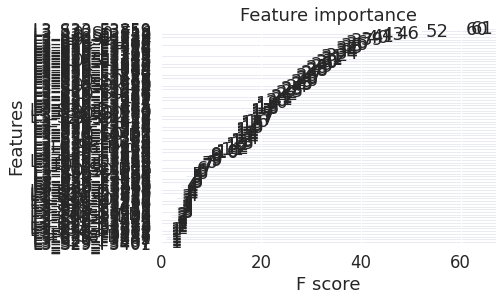

In [ ]:
xgb.plot_importance(final_gb)

In [ ]:
importances = final_gb.get_fscore()
importances

{'L0_S0_D1': 14,
 'L0_S0_D3': 3,
 'L0_S0_F0': 17,
 'L0_S0_F10': 17,
 'L0_S0_F12': 17,
 'L0_S0_F14': 6,
 'L0_S0_F16': 52,
 'L0_S0_F18': 43,
 'L0_S0_F2': 14,
 'L0_S0_F20': 25,
 'L0_S0_F22': 3,
 'L0_S0_F4': 23,
 'L0_S0_F6': 26,
 'L0_S0_F8': 13,
 'L0_S1_D26': 7,
 'L0_S1_D30': 2,
 'L0_S1_F24': 40,
 'L0_S1_F28': 31,
 'L0_S8_D145': 12,
 'L0_S8_D147': 1,
 'L0_S8_F144': 8,
 'L3_S29_D3316': 4,
 'L3_S29_D3474': 17,
 'L3_S29_D3477': 3,
 'L3_S29_F3315': 18,
 'L3_S29_F3318': 16,
 'L3_S29_F3321': 22,
 'L3_S29_F3324': 39,
 'L3_S29_F3327': 21,
 'L3_S29_F3330': 10,
 'L3_S29_F3333': 30,
 'L3_S29_F3336': 25,
 'L3_S29_F3339': 14,
 'L3_S29_F3342': 13,
 'L3_S29_F3345': 31,
 'L3_S29_F3348': 37,
 'L3_S29_F3351': 31,
 'L3_S29_F3354': 23,
 'L3_S29_F3357': 21,
 'L3_S29_F3360': 12,
 'L3_S29_F3367': 5,
 'L3_S29_F3370': 3,
 'L3_S29_F3373': 34,
 'L3_S29_F3376': 15,
 'L3_S29_F3379': 27,
 'L3_S29_F3382': 14,
 'L3_S29_F3385': 6,
 'L3_S29_F3388': 7,
 'L3_S29_F3395': 3,
 'L3_S29_F3401': 1,
 'L3_S29_F3404': 2,
 'L3_S29_F34

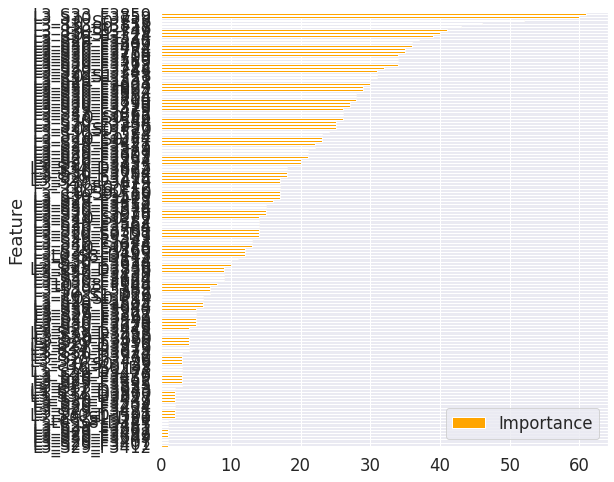

In [ ]:
importance_frame = pd.DataFrame({'Importance': list(importances.values()), 'Feature': list(importances.keys())})
importance_frame.sort_values(by = 'Importance', inplace = True)
importance_frame.plot(kind = 'barh', x = 'Feature', figsize = (8,8), color = 'orange')

Analyzing Performance on Test Data



In [ ]:
testdmat = xgb.DMatrix(features_test, labels_test)


In [ ]:
from sklearn.metrics import accuracy_score
y_pred = final_gb.predict(testdmat) # Predict using our testdmat
y_pred

array([5.59425494e-03, 4.44542020e-05, 3.23409295e-05, 2.42987653e-06,
       6.27449936e-06, 2.18625846e-05, 1.46544116e-05, 5.30043690e-05,
       8.78507271e-05, 9.27095971e-06, 9.24384003e-05, 7.05609782e-05,
       7.82405987e-05, 1.67508930e-04, 2.97475926e-04, 5.02450530e-06,
       2.36172582e-05, 5.59425494e-03, 1.13785618e-05, 6.56579505e-05,
       3.65055399e-04, 2.95536620e-06, 5.11958533e-05, 5.07313933e-04,
       3.86981672e-04, 3.42874846e-05, 7.87069584e-05, 3.49931070e-05,
       1.83484390e-05, 3.61224302e-05, 7.67442747e-04, 8.63043751e-05,
       1.50164225e-04, 2.43550306e-03, 1.82959833e-04, 1.60438376e-05,
       1.66444206e-05, 5.58239371e-05, 1.79447889e-04, 4.60854462e-05,
       5.91866446e-05, 4.74729139e-04, 2.38022592e-04, 5.59425494e-03,
       2.91012771e-06, 6.78284487e-05, 1.57170172e-04, 5.02424700e-05,
       9.15880084e-01, 3.37148464e-04, 1.64471840e-05, 5.01448230e-05,
       2.04736760e-04, 7.71140403e-05, 5.35684103e-06, 2.15322347e-04,
      

In [ ]:


import pandas as pd
import numpy as np
import xgboost as xgb
from xgboost.sklearn import XGBClassifier

In [ ]:
### test set ###
test_numeric = pd.read_csv('test_numeric.csv',nrows=10000)
test_date = pd.read_csv('test_date.csv',nrows=10000)
data_merge = pd.merge(test_numeric, test_date, on='Id',suffixes=('num', 'date'))
### test set ###

In [ ]:
def makesubmit(clf,testdf,featurelist,output="submit.csv"):
    testdf = testdf.fillna(0)
    feature_test = testdf[featurelist]
    
    pred = clf.predict(feature_test)
    
    ids = list(testdf['Id'])
    
    fout = open(output,'w')
    fout.write("Id,Response\n")
    for i,id in enumerate(ids):
        fout.write('%s,%s\n' % (str(id),str(pred[i])))
    fout.close()

In [ ]:
makesubmit(clf,data_merge,featurelist,output="submit.csv")
